*Reading in Google Mobility Data: 

Note: data are read as "percent change from baseline"

This was my R code: 

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
#import ipywidgets as widgets
import ipydatatable
#to use: ipydatatable.InteractiveTable(table =data)

Reading in dataframe and filtering for State of Virginia

In [4]:
#this takes a long while to run and is a huge file so I did this once and saved a smaller, csv file filtered to Virginia

#Google_Mob = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=6d352e35dcffafce")
# #Google_Mob = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=6d352e35dcffafce", dtype={'country_region_code': 'str', 'country_region': 'str', 'sub_region_1': 'str', 'sub_region_2': 'str', 'metro_area': 'str', 'iso_3166_2_code': 'str', 'census_fips_code': 'np.int64', 'place_id': 'str', 'date': 'np.datetime64', 'retail_and_recreation_percent_change_from_baseline': 'np.float64', 'grocery_and_pharmacy_percent_change_from_baseline': 'np.float64', 'parks_percent_change_from_baseline': 'np.float64', 'transit_stations_percent_change_from_baseline': 'np.float64', 'workplaces_percent_change_from_baseline': 'np.float64', 'residential_percent_change_from_baseline': 'np.float64' })
#Google_Mob_VA = Google_Mob[(Google_Mob.country_region == "United States") & (Google_Mob.sub_region_1 == "Virginia")] #filtering for Virginia, USA
#del Google_Mob
# Google_Mob_VA.to_csv("./google_mobility_VA.csv")


In [20]:
Google_Mob_VA = pd.read_csv("./google_mobility_VA.csv")


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
Google_Mob_VA['date'] = pd.to_datetime(Google_Mob_VA['date']) #change to date format.

In [4]:
Google_Mob_VA.columns
Google_Mob_VA.dtypes

country_region_code                                           object
country_region                                                object
sub_region_1                                                  object
sub_region_2                                                  object
metro_area                                                   float64
iso_3166_2_code                                               object
census_fips_code                                             float64
place_id                                                      object
date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_ba

Renaming State, Counties

In [5]:
Google_Mob_VA = Google_Mob_VA.rename(columns={"sub_region_1": "state", "sub_region_2": "county", "retail_and_recreation_percent_change_from_baseline": "retail", "grocery_and_pharmacy_percent_change_from_baseline":"grocery", "parks_percent_change_from_baseline": "parks","transit_stations_percent_change_from_baseline": "transit", "workplaces_percent_change_from_baseline": "workplaces", "residential_percent_change_from_baseline": "residential"}) #rename state, county columns


In [6]:
Google_Mob_VA = Google_Mob_VA.drop(['iso_3166_2_code', 'place_id', 'country_region_code', "metro_area"], axis=1) #dropping unnecessary columns

In [7]:
#checking
Google_Mob_VA.columns

Index(['country_region', 'state', 'county', 'census_fips_code', 'date',
       'retail', 'grocery', 'parks', 'transit', 'workplaces', 'residential'],
      dtype='object')

In [8]:
Google_Mob_VA.dtypes

country_region              object
state                       object
county                      object
census_fips_code           float64
date                datetime64[ns]
retail                     float64
grocery                    float64
parks                      float64
transit                    float64
workplaces                 float64
residential                float64
dtype: object

In [9]:
#using same masking technique that Wenwei employed here. 
start_date = '03-01-2020'
end_date = '09-01-2020'

mask = (Google_Mob_VA['date'] > start_date) & (Google_Mob_VA['date'] <= end_date)
#assign mask to df to return the rows with _date between our specified start/end dates

Google_Mob_VA_peakdates = Google_Mob_VA.loc[mask] #specified the date range to be within 1st 6 months of pandemic onset.
#NYTCovid_peakdates

In [10]:
#checking date range
Google_Mob_VA_peakdates.date.describe(datetime_is_numeric=True)

count                            21590
mean     2020-05-27 04:51:28.096340736
min                2020-03-02 00:00:00
25%                2020-04-13 00:00:00
50%                2020-05-27 00:00:00
75%                2020-07-10 00:00:00
max                2020-09-01 00:00:00
Name: date, dtype: object

In [11]:
display(Google_Mob_VA_peakdates)

,country_region,state,county,census_fips_code,date,retail,grocery,parks,transit,workplaces,residential
16,United States,Virginia,NaN,NaN,2020-03-02,7.0,5.0,20.0,2.0,5.0,-1.0
17,United States,Virginia,NaN,NaN,2020-03-03,14.0,10.0,40.0,2.0,-4.0,0.0
18,United States,Virginia,NaN,NaN,2020-03-04,9.0,8.0,39.0,5.0,2.0,-1.0
19,United States,Virginia,NaN,NaN,2020-03-05,6.0,6.0,19.0,4.0,2.0,-1.0
20,United States,Virginia,NaN,NaN,2020-03-06,3.0,1.0,5.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
86659,United States,Virginia,York County,51199.0,2020-08-27,-4.0,NaN,NaN,NaN,-43.0,13.0
86660,United States,Virginia,York County,51199.0,2020-08-28,-6.0,NaN,NaN,NaN,-41.0,12.0
86661,United States,Virginia,York County,51199.0,2020-08-29,-7.0,NaN,NaN,NaN,NaN,NaN
86662,United States,Virginia,York County,51199.0,2020-08-31,NaN,NaN,NaN,NaN,-40.0,11.0


In [12]:
#dropping rows with missing county data
#grouping by date, state, and county
Google_Mob_VA_peakdates = Google_Mob_VA_peakdates.dropna(subset=['county'])

In [39]:
#Google_Mob_VA_peakdates.county.unique()
Google_Mob_VA_peakdates[Google_Mob_VA_peakdates.county == 'Albemarle County'].date

1467   2020-03-02
1468   2020-03-03
1469   2020-03-04
1470   2020-03-05
1471   2020-03-06
          ...    
1646   2020-08-28
1647   2020-08-29
1648   2020-08-30
1649   2020-08-31
1650   2020-09-01
Name: date, Length: 184, dtype: datetime64[ns]

Basic plots for Sanity check

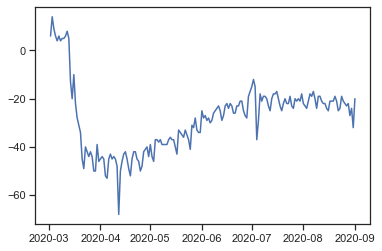

In [40]:


plt.plot(Google_Mob_VA_peakdates[Google_Mob_VA_peakdates.county == 'Albemarle County'].date, Google_Mob_VA_peakdates[Google_Mob_VA_peakdates.county == 'Albemarle County'].retail)
plt.show()

melting by different mobility indices


state                       object
county                      object
metro_area                 float64
census_fips_code           float64
date                datetime64[ns]
retail                     float64
grocery                    float64
parks                      float64
transit                    float64
workplaces                 float64
residential                float64

Splitting mobility data into more generic groups: residential vs. non-residential

In [13]:
Google_Mob_VA_peakdates_grouped = Google_Mob_VA_peakdates.groupby(['date','state','county']).mean().sort_values(["county","date"])
#mutating new column which is the average non-residential mobility. 
Google_Mob_VA_peakdates_grouped['Non_Residential'] = Google_Mob_VA_peakdates_grouped[['retail', 'grocery','parks', 'transit', 'workplaces']].mean(axis=1)
#adding a 7d moving average to non-residential smooth out the weekend effects and deal with NaN values
Google_Mob_VA_peakdates_grouped['Non_Residential_7d_Rolling'] = Google_Mob_VA_peakdates_grouped['Non_Residential'].rolling(7).mean()
Google_Mob_VA_peakdates_grouped

,,,census_fips_code,retail,grocery,parks,transit,workplaces,residential,Non_Residential,Non_Residential_7d_Rolling
date,state,county,,,,,,,,,
2020-03-02,Virginia,Accomack County,51001.0,9.0,8.0,NaN,NaN,5.0,1.0,7.333333,NaN
2020-03-03,Virginia,Accomack County,51001.0,18.0,8.0,NaN,NaN,2.0,-2.0,9.333333,NaN
2020-03-04,Virginia,Accomack County,51001.0,11.0,9.0,NaN,NaN,2.0,-2.0,7.333333,NaN
2020-03-05,Virginia,Accomack County,51001.0,6.0,8.0,NaN,NaN,3.0,-1.0,5.666667,NaN
2020-03-06,Virginia,Accomack County,51001.0,1.0,3.0,NaN,NaN,1.0,3.0,1.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,Virginia,York County,51199.0,-4.0,NaN,NaN,NaN,-43.0,13.0,-23.500000,-23.071429
2020-08-28,Virginia,York County,51199.0,-6.0,NaN,NaN,NaN,-41.0,12.0,-23.500000,-22.928571
2020-08-29,Virginia,York County,51199.0,-7.0,NaN,NaN,NaN,NaN,NaN,-7.000000,-23.071429


In [14]:
#.reset_index() is equivalent to ungroup()
Google_Mob_VA_peakdates_clean = Google_Mob_VA_peakdates_grouped.reset_index()
Google_Mob_VA_peakdates_clean['date'] = pd.to_datetime(Google_Mob_VA_peakdates_clean['date']) #change to date format.
Google_Mob_VA_peakdates_clean = Google_Mob_VA_peakdates_clean.sort_values(["county","date"])
#Google_Mob_VA_peakdates_clean['Non_Residential'] = Google_Mob_VA_peakdates_grouped[['retail', 'grocery','parks', 'transit', 'workplaces']].mean(axis=1)

In [21]:

#Google_Mob_VA_peakdates_clean
ipydatatable.InteractiveTable(table =Google_Mob_VA_peakdates_clean)

InteractiveTable(table=[{'date': 1583107200000, 'state': 'Virginia', 'county': 'Accomack County', 'census_fips…

In [16]:

#writing cleaned dataset to csv
Google_Mob_VA_peakdates_clean.to_csv("./Google_Mob_VA_peakdates_clean.csv")
Google_Mob_VA_peakdates_clean

,date,state,county,census_fips_code,retail,grocery,parks,transit,workplaces,residential,Non_Residential,Non_Residential_7d_Rolling
0,2020-03-02,Virginia,Accomack County,51001.0,9.0,8.0,NaN,NaN,5.0,1.0,7.333333,NaN
1,2020-03-03,Virginia,Accomack County,51001.0,18.0,8.0,NaN,NaN,2.0,-2.0,9.333333,NaN
2,2020-03-04,Virginia,Accomack County,51001.0,11.0,9.0,NaN,NaN,2.0,-2.0,7.333333,NaN
3,2020-03-05,Virginia,Accomack County,51001.0,6.0,8.0,NaN,NaN,3.0,-1.0,5.666667,NaN
4,2020-03-06,Virginia,Accomack County,51001.0,1.0,3.0,NaN,NaN,1.0,3.0,1.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21401,2020-08-27,Virginia,York County,51199.0,-4.0,NaN,NaN,NaN,-43.0,13.0,-23.500000,-23.071429
21402,2020-08-28,Virginia,York County,51199.0,-6.0,NaN,NaN,NaN,-41.0,12.0,-23.500000,-22.928571
21403,2020-08-29,Virginia,York County,51199.0,-7.0,NaN,NaN,NaN,NaN,NaN,-7.000000,-23.071429
21404,2020-08-31,Virginia,York County,51199.0,NaN,NaN,NaN,NaN,-40.0,11.0,-40.000000,-28.642857


In [22]:


Google_Mob_VA_peakdates_clean_melted_all = pd.melt(Google_Mob_VA_peakdates_clean, id_vars = ['state','county', 'date'], value_vars=['retail', 'grocery','parks', 'transit', 'workplaces','residential','Non_Residential'])
Google_Mob_VA_peakdates_clean_melted_all
Google_Mob_VA_peakdates_clean_melted_residential = pd.melt(Google_Mob_VA_peakdates_clean, id_vars = ['state','county', 'date'], value_vars=['residential','Non_Residential'])
Google_Mob_VA_peakdates_clean_melted_residential
Google_Mob_VA_peakdates_clean_melted_residential_rollmean = pd.melt(Google_Mob_VA_peakdates_clean, id_vars = ['state','county', 'date'], value_vars=['Non_Residential', 'Non_Residential_7d_Rolling'])
Google_Mob_VA_peakdates_clean_melted_residential_rollmean


,state,county,date,variable,value
0,Virginia,Accomack County,2020-03-02,Non_Residential,7.333333
1,Virginia,Accomack County,2020-03-03,Non_Residential,9.333333
2,Virginia,Accomack County,2020-03-04,Non_Residential,7.333333
3,Virginia,Accomack County,2020-03-05,Non_Residential,5.666667
4,Virginia,Accomack County,2020-03-06,Non_Residential,1.666667
...,...,...,...,...,...
42807,Virginia,York County,2020-08-27,Non_Residential_7d_Rolling,-23.071429
42808,Virginia,York County,2020-08-28,Non_Residential_7d_Rolling,-22.928571
42809,Virginia,York County,2020-08-29,Non_Residential_7d_Rolling,-23.071429
42810,Virginia,York County,2020-08-31,Non_Residential_7d_Rolling,-28.642857


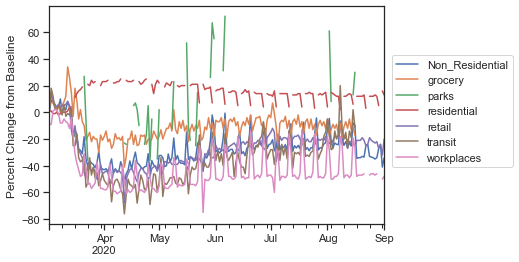

In [46]:
g = Google_Mob_VA_peakdates_clean_melted_all[Google_Mob_VA_peakdates_clean_melted_all.county == 'Albemarle County'].pivot(index="date", columns=["variable"], values="value").plot()
g= g.legend(loc='best',bbox_to_anchor=(0.8, 0., 0.6, 0.8))
plt.ylabel("Percent Change from Baseline")
plt.xlabel("")
plt.show()


Showing average Residential vs. Non-Residential Mobility for single county (Albemarle) over time. Note the significant effect of weekends leading to spikes in mobility. 

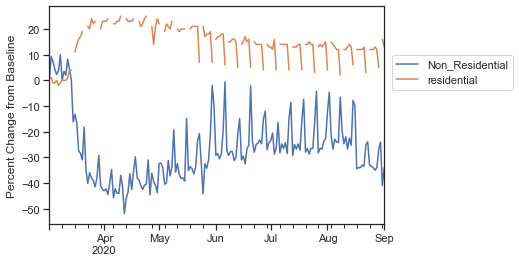

In [47]:
g = Google_Mob_VA_peakdates_clean_melted_residential[Google_Mob_VA_peakdates_clean_melted_residential.county == 'Albemarle County'].pivot(index="date", columns=["variable"], values="value").plot()
g= g.legend(loc='best',bbox_to_anchor=(0.8, 0., 0.6, 0.8))
plt.ylabel("Percent Change from Baseline")
plt.xlabel("")
plt.show()


Now showing raw Non-Residential Data as a 7-day rolling mean. I think this looks a lot better. 

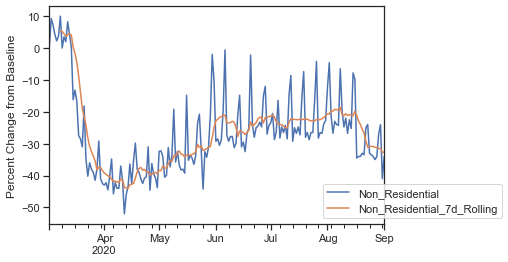

In [48]:
g = Google_Mob_VA_peakdates_clean_melted_residential_rollmean[Google_Mob_VA_peakdates_clean_melted_residential_rollmean.county == 'Albemarle County'].pivot(index="date", columns=["variable"], values="value").plot()
g= g.legend(loc='best',bbox_to_anchor=(0.8, 0., 0.6, 0.8))
plt.ylabel("Percent Change from Baseline")
plt.xlabel("")
plt.show()






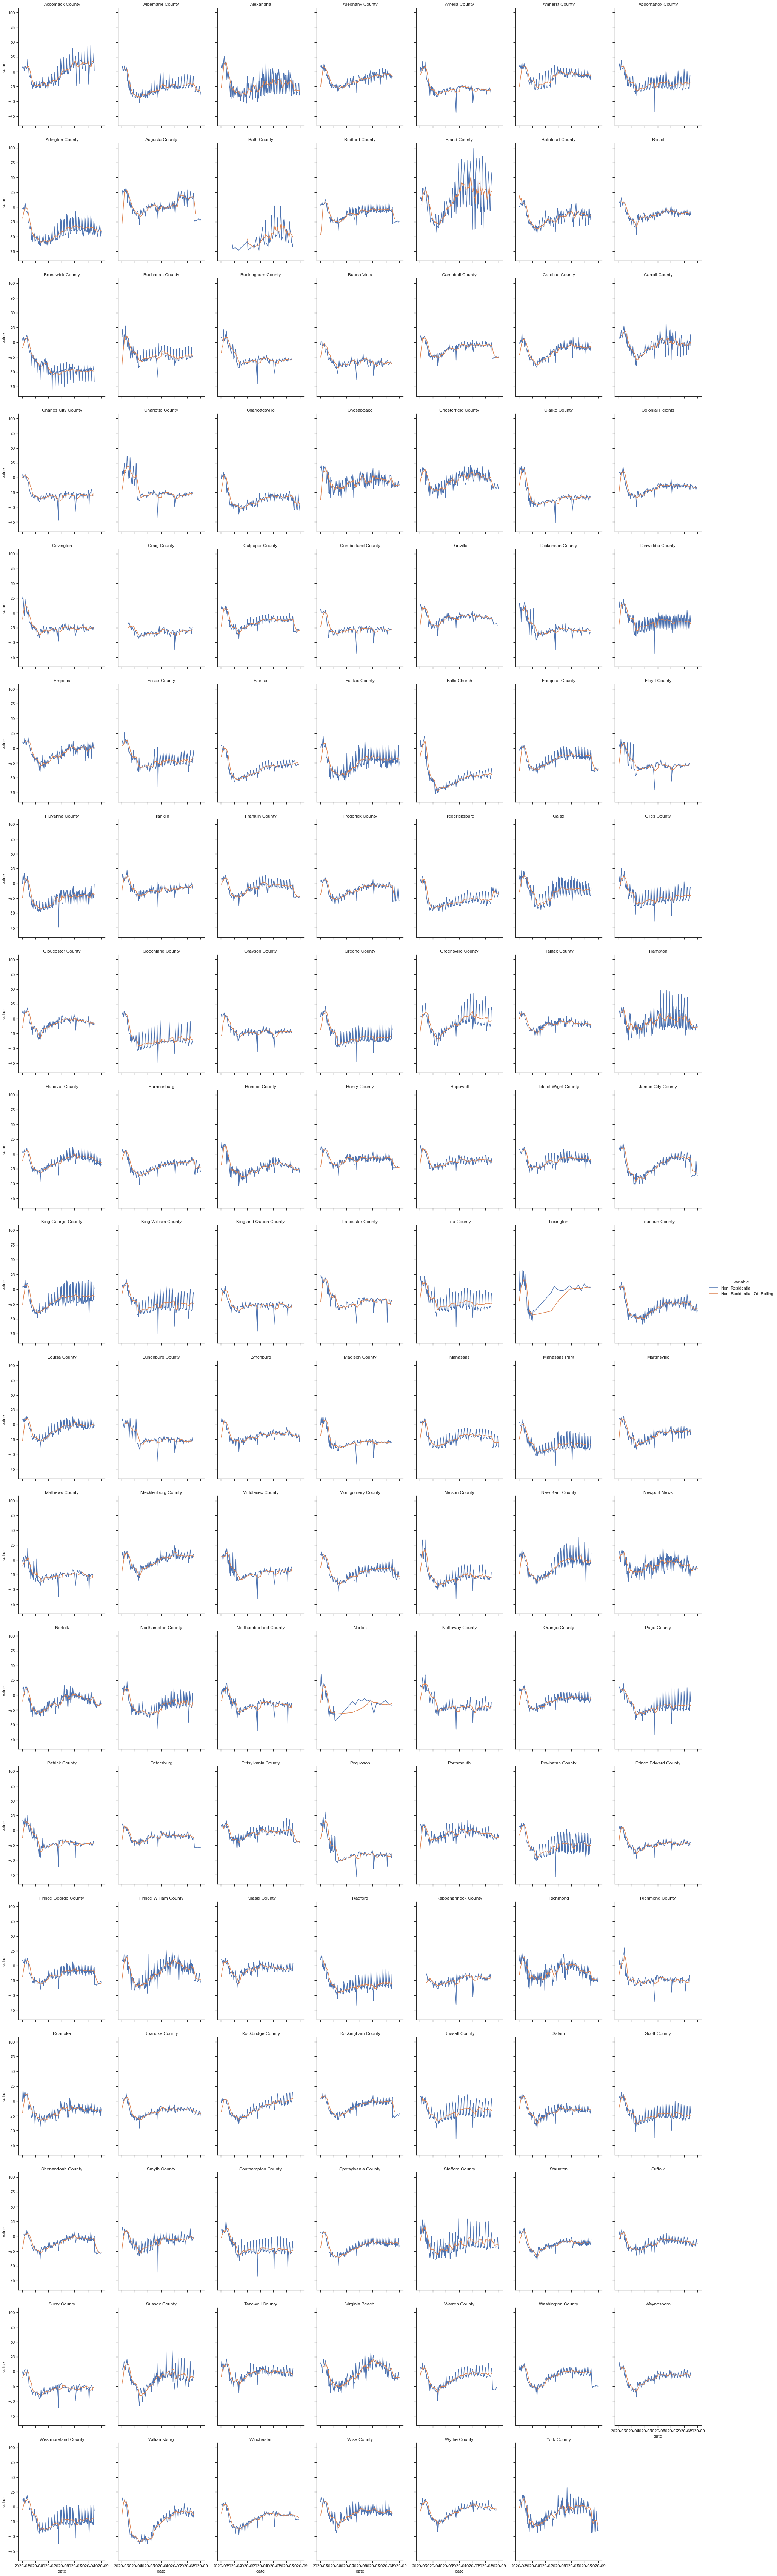

In [49]:
# Create a grid : initialize it

sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Plot the lines on two facets
g=sns.relplot(
    data=Google_Mob_VA_peakdates_clean_melted_residential_rollmean,
    x="date", y="value",
    hue="variable",  col="county",
    kind="line",  col_wrap =7,
    height=5, aspect=.75, facet_kws=dict(sharex=True),
)
g = g.set_titles(col_template = '{col_name}')
plt.ylabel("Percent Change from Baseline")
plt.xlabel("")
plt.savefig("mobility_plot.pdf")
plt.show()
#sns.*plot*?



writing melted dataset to csv as well

In [50]:
Google_Mob_VA_peakdates_clean.to_csv("./Google_Mob_VA_peakdates_clean.csv")
Google_Mob_VA_peakdates_clean

,date,state,county,retail,grocery,parks,transit,workplaces,residential,Non_Residential,Non_Residential_7d_Rolling
0,2020-03-02,Virginia,Accomack County,9.0,8.0,NaN,NaN,5.0,1.0,7.333333,NaN
1,2020-03-03,Virginia,Accomack County,18.0,8.0,NaN,NaN,2.0,-2.0,9.333333,NaN
2,2020-03-04,Virginia,Accomack County,11.0,9.0,NaN,NaN,2.0,-2.0,7.333333,NaN
3,2020-03-05,Virginia,Accomack County,6.0,8.0,NaN,NaN,3.0,-1.0,5.666667,NaN
4,2020-03-06,Virginia,Accomack County,1.0,3.0,NaN,NaN,1.0,3.0,1.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21401,2020-08-27,Virginia,York County,-4.0,NaN,NaN,NaN,-43.0,13.0,-23.500000,-23.071429
21402,2020-08-28,Virginia,York County,-6.0,NaN,NaN,NaN,-41.0,12.0,-23.500000,-22.928571
21403,2020-08-29,Virginia,York County,-7.0,NaN,NaN,NaN,NaN,NaN,-7.000000,-23.071429
21404,2020-08-31,Virginia,York County,NaN,NaN,NaN,NaN,-40.0,11.0,-40.000000,-28.642857


In [51]:
ipydatatable.InteractiveTable(table =Google_Mob_VA_peakdates_clean)

InteractiveTable(table=[{'date': 1583107200000, 'state': 'Virginia', 'county': 'Accomack County', 'retail': 9.…